In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv('StudentsPerformance.csv')

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.shape

(1000, 8)

In [11]:
df.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

In [12]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

THERE ARE NO DUPLCIATE VALUES 

In [20]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [22]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [24]:
print("Categories in 'gender' variable:",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:",end=" ")
print(df['test preparation course'].unique())


Categories in 'gender' variable: ['female' 'male']
Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [25]:
numeric_feature=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print('We have {} numerical features :{}'.format(len(numeric_feature),numeric_feature))
print('We have {} numerical features :{}'.format(len(categorical_features),categorical_features))


We have 3 numerical features :['math score', 'reading score', 'writing score']
We have 5 numerical features :['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Adding total and average score for all students 


In [26]:
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['average_score']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [33]:
reading_full=df[df['reading score']==100]['reading score'].count()
writing_full=df[df['writing score']==100]['writing score'].count()
math_full=df[df['math score']==100]['math score'].count()

print(f'number of students with full marks in reading: {reading_full}')
print(f'number of students with full marks in writing: {writing_full}')
print(f'number of students with full marks in math: {math_full}')

number of students with full marks in reading: 17
number of students with full marks in writing: 14
number of students with full marks in math: 7


number of students with full marks in reading: 17 
number of students with full marks in writing: 14 
number of students with full marks in math: 7


In [38]:
reading_less_20=df[df['reading score']<=20]['reading score'].count()
writing_less_20=df[df['writing score']==100]['writing score'].count()
math_less_20=df[df['math score']<=20]['math score'].count()

print(f'number of students with less than 20  marks in reading: {reading_less_20}')
print(f'number of students with less than 20  marks in writing: {writing_less_20}')
print(f'number of students with  less than 20 marks in math: {math_less_20}')

number of students with less than 20  marks in reading: 1
number of students with less than 20  marks in writing: 14
number of students with  less than 20 marks in math: 4


students perform the worst in maths 
studenst perform the best in read test 


<Axes: xlabel='average_score', ylabel='Count'>

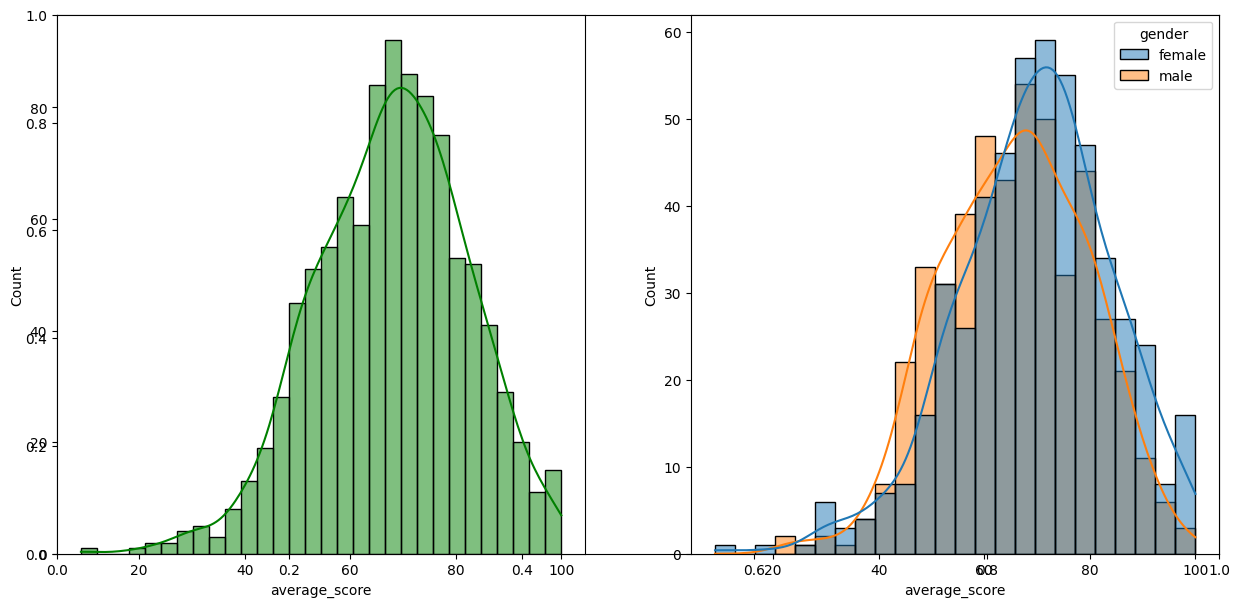

In [51]:
fig,axs=plt.subplots(figsize=(15,7))

plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')